# Hydroponics Farm Sensor Data

The objective is to determine what LDR values should be, given all the other conditions. Using pandas, create a RandomForest model of the data using some of the rows of the data. Validate the data using a subset of your data. Evaluate your Mean Average Error (MAE). Predict what LDR should be expected given X values of \[temp1=40, temp2=20, heater is off, humidity1=60, humidity2=90, and pump =on].

# Importing the necessary libraries

In [211]:
import pandas as pd
import seaborn as sns
import numpy as np

# Loading the data

In [212]:
df = pd.read_csv("https://raw.githubusercontent.com/Lormenyo/iot-projects/master/Final_Project_Designing_IoT_system/part_c/method2/subscriber.csv")

In [213]:
df.head()

,DataID,temp1,temp2,ldr,heater,humidity1,humidity2,pump,TimeRead
0,19,33,0,0,0,0,0,0,2020-12-06 14:18:52
1,20,0,0,0,0,0,74,0,2020-12-06 14:18:52
2,21,0,21,0,0,0,0,0,2020-12-06 14:18:52
3,22,0,0,0,0,0,0,OFF,2020-12-06 14:18:52
4,23,0,0,0,0,33,0,0,2020-12-06 14:18:52


In [214]:
df['TimeRead']= pd.to_datetime(df['TimeRead']) 

# Exploring the Data

In [215]:
df.describe()

,DataID,temp1,temp2,ldr,humidity1,humidity2
count,12687.000000,12687.000000,12687.000000,12687.000000,12687.000000,12687.000000
mean,6362.000000,7.401592,5.268937,38.232443,6.833688,14.725703
std,3662.565767,14.385294,10.292630,161.856924,15.109801,29.577536
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3190.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6362.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9533.500000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12705.000000,40.000000,30.000000,997.000000,60.000000,100.000000


In [216]:
df.shape

(12687, 9)

# Data Preprocessing

In [217]:
new_df = df.copy()

In [218]:
new_df = df.replace(0, np.nan)

In [219]:
new_df.head()

,DataID,temp1,temp2,ldr,heater,humidity1,humidity2,pump,TimeRead
0,19,33.0,NaN,NaN,0,NaN,NaN,0,2020-12-06 14:18:52
1,20,NaN,NaN,NaN,0,NaN,74.0,0,2020-12-06 14:18:52
2,21,NaN,21.0,NaN,0,NaN,NaN,0,2020-12-06 14:18:52
3,22,NaN,NaN,NaN,0,NaN,NaN,OFF,2020-12-06 14:18:52
4,23,NaN,NaN,NaN,0,33.0,NaN,0,2020-12-06 14:18:52


There are missing values and the heater and pump columns have categorical values that need to be encoded

### Encoding the data

ffill and bfill do not work on strings so I will convert the ON, and OFF values to numeric data by recoding it

In [220]:
new_df.dtypes

DataID                int64
temp1               float64
temp2               float64
ldr                 float64
heater               object
humidity1           float64
humidity2           float64
pump                 object
TimeRead     datetime64[ns]
dtype: object

In [221]:
new_df["heater"] = new_df["heater"].astype('category')
new_df["pump"] = new_df["pump"].astype('category')

In [222]:
new_df.dtypes

DataID                int64
temp1               float64
temp2               float64
ldr                 float64
heater             category
humidity1           float64
humidity2           float64
pump               category
TimeRead     datetime64[ns]
dtype: object

In [223]:
new_df["pump"].cat.categories

Index(['0', 'OFF', 'ON'], dtype='object')

In [224]:
new_df["heater"] = new_df["heater"].replace('0', np.nan)
new_df["pump"] = new_df["pump"].replace('0', np.nan)

In [225]:
new_df.head()

,DataID,temp1,temp2,ldr,heater,humidity1,humidity2,pump,TimeRead
0,19,33.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-06 14:18:52
1,20,NaN,NaN,NaN,NaN,NaN,74.0,NaN,2020-12-06 14:18:52
2,21,NaN,21.0,NaN,NaN,NaN,NaN,NaN,2020-12-06 14:18:52
3,22,NaN,NaN,NaN,NaN,NaN,NaN,OFF,2020-12-06 14:18:52
4,23,NaN,NaN,NaN,NaN,33.0,NaN,NaN,2020-12-06 14:18:52


In [226]:
recode = {"OFF": 0, "ON": 1}

In [227]:
new_df["heater"] = new_df["heater"].replace(recode)
new_df["pump"] = new_df["pump"].replace(recode)

In [228]:
new_df.head()

,DataID,temp1,temp2,ldr,heater,humidity1,humidity2,pump,TimeRead
0,19,33.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-06 14:18:52
1,20,NaN,NaN,NaN,NaN,NaN,74.0,NaN,2020-12-06 14:18:52
2,21,NaN,21.0,NaN,NaN,NaN,NaN,NaN,2020-12-06 14:18:52
3,22,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2020-12-06 14:18:52
4,23,NaN,NaN,NaN,NaN,33.0,NaN,NaN,2020-12-06 14:18:52


In [229]:
new_df.fillna(method="ffill", inplace=True)
new_df.fillna(method="bfill", inplace=True)

In [230]:
new_df.head()

,DataID,temp1,temp2,ldr,heater,humidity1,humidity2,pump,TimeRead
0,19,33.0,21.0,225.0,1.0,33.0,74.0,0.0,2020-12-06 14:18:52
1,20,33.0,21.0,225.0,1.0,33.0,74.0,0.0,2020-12-06 14:18:52
2,21,33.0,21.0,225.0,1.0,33.0,74.0,0.0,2020-12-06 14:18:52
3,22,33.0,21.0,225.0,1.0,33.0,74.0,0.0,2020-12-06 14:18:52
4,23,33.0,21.0,225.0,1.0,33.0,74.0,0.0,2020-12-06 14:18:52


In [231]:
new_df.isna().sum()

DataID       0
temp1        0
temp2        0
ldr          0
heater       0
humidity1    0
humidity2    0
pump         0
TimeRead     0
dtype: int64

# Data Visualizations

In [232]:
new_df.drop("DataID", inplace=True, axis=1)
new_df.set_index("TimeRead", inplace=True)

mean_new_df = new_df.groupby([new_df.index.hour, new_df.index.minute]).mean()
mean_new_df.rename_axis(index=['hours', 'minutes'], inplace=True)
mean_new_df.head()

temp1      temp2         ldr  ...  humidity1  humidity2      pump
hours minutes                                    ...                                
14    18       33.435897  22.666667  432.153846  ...  32.128205  74.051282  0.000000
      19       35.625000  25.153571  622.246429  ...  31.675000  67.864286  0.239286
      20       34.850000  25.039286  554.010714  ...  31.975000  70.332143  0.503571
      21       35.049470  25.070671  465.685512  ...  30.226148  65.766784  0.247350
      22       34.911032  25.174377  505.750890  ...  33.960854  70.722420  0.423488

[5 rows x 7 columns]

In [233]:
mean_new_df.reset_index(inplace=True)
mean_new_df.head()

,hours,minutes,temp1,temp2,ldr,heater,humidity1,humidity2,pump
0,14,18,33.435897,22.666667,432.153846,0.641026,32.128205,74.051282,0.000000
1,14,19,35.625000,25.153571,622.246429,0.475000,31.675000,67.864286,0.239286
2,14,20,34.850000,25.039286,554.010714,0.496429,31.975000,70.332143,0.503571
3,14,21,35.049470,25.070671,465.685512,0.583039,30.226148,65.766784,0.247350
4,14,22,34.911032,25.174377,505.750890,0.747331,33.960854,70.722420,0.423488


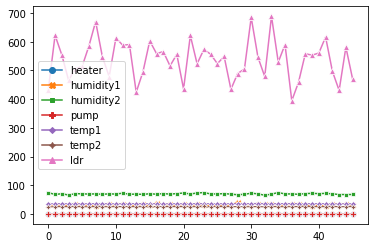

In [234]:
sns.lineplot(data=mean_new_df[['heater', 'humidity1', 'humidity2', 'pump', 'temp1', 'temp2', 'ldr']], markers=True, dashes=False)

The LDR has very high values so I will remove that from the plot

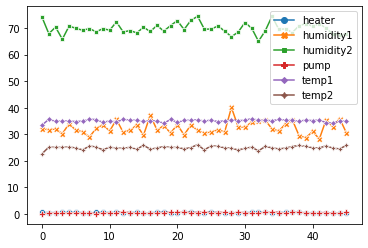

In [235]:
sns.lineplot(data=mean_new_df[['heater', 'humidity1', 'humidity2', 'pump', 'temp1', 'temp2']], markers=True, dashes=False)

Now we can see the other variables better

### Temperature Trend

In [236]:
mean_temp1 = pd.DataFrame(mean_new_df["temp1"], columns=["temp1"])

In [237]:
mean_temp1.head()

,temp1
0,33.435897
1,35.625000
2,34.850000
3,35.049470
4,34.911032


In [238]:
mean_temp2 = pd.DataFrame(mean_new_df["temp2"], columns=["temp2"])

In [239]:
mean_temp2.head()

,temp2
0,22.666667
1,25.153571
2,25.039286
3,25.070671
4,25.174377


Text(0.5, 1.0, 'temp1 Average Temperature values per minute')

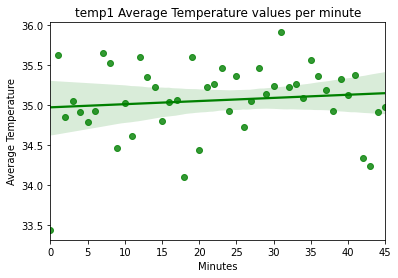

In [240]:
temp1_ax = sns.regplot(x=mean_temp1.index, y="temp1", color="g", data=mean_temp1)
temp1_ax.set_xlabel("Minutes")
temp1_ax.set_ylabel("Average Temperature")
temp1_ax.set_title("temp1 Average Temperature values per minute")


The average temperature for temperature1 increases slowly from about 34.9 to 35.1 during the 45 minute period. It seems to be fairly constant around 35.0.

Text(0.5, 1.0, 'temp2 Average Temperature values per minute')

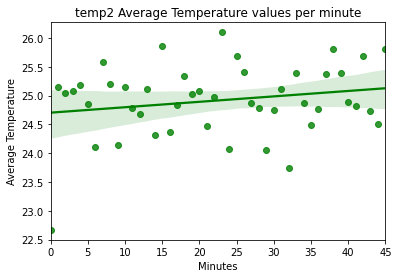

In [241]:
temp2_ax = sns.regplot(x=mean_temp2.index, y="temp2", color="g", data=mean_temp2)
temp2_ax.set_xlabel("Minutes")
temp2_ax.set_ylabel("Average Temperature")
temp2_ax.set_title("temp2 Average Temperature values per minute")

The average temperature for temperature2 increases slowly from an average of about 24.85 to 25.10 during the 45 minute period.

### Humidity Trend

In [242]:
mean_humidity1 = pd.DataFrame(mean_new_df["humidity1"], columns=["humidity1"])
mean_humidity2 =  pd.DataFrame(mean_new_df["humidity2"], columns=["humidity2"])

Text(0.5, 1.0, 'humidity1 Average Humidity values per minute')

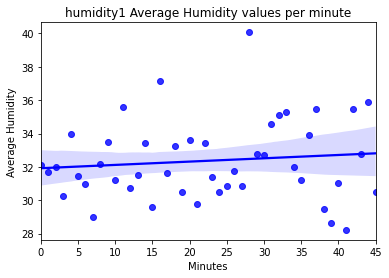

In [243]:
humidity1_ax = sns.regplot(x=mean_humidity1.index, y="humidity1", color="b", data=mean_humidity1)
humidity1_ax.set_xlabel("Minutes")
humidity1_ax.set_ylabel("Average Humidity")
humidity1_ax.set_title("humidity1 Average Humidity values per minute")

The average humidity for humidity1 is fairly constant around 32 during the 45 minute period. It increases slowly by just a little to about 32.5

Text(0.5, 1.0, 'humidity2 Average Humidity values per minute')

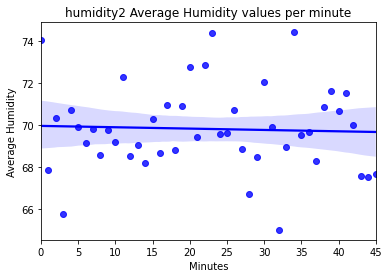

In [244]:
humidity2_ax = sns.regplot(x=mean_humidity2.index, y="humidity2", color="b", data=mean_humidity2)
humidity2_ax.set_xlabel("Minutes")
humidity2_ax.set_ylabel("Average Humidity")
humidity2_ax.set_title("humidity2 Average Humidity values per minute")

The average humidity for humidity2 is fairly constant around 70 during the 45 minute period.

### Heater Trend

In [245]:
heater = pd.DataFrame(mean_new_df["heater"], columns=["heater"])

In [246]:
heater.head()

,heater
0,0.641026
1,0.475000
2,0.496429
3,0.583039
4,0.747331


Text(0.5, 1.0, 'Average Heater on times per minute')

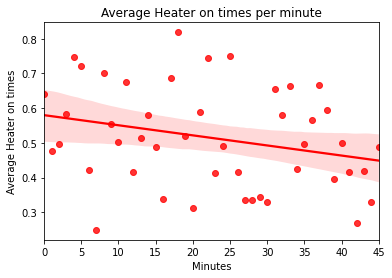

In [247]:
heater_ax = sns.regplot(x=heater.index, y="heater", color="r", data=heater)
heater_ax.set_xlabel("Minutes")
heater_ax.set_ylabel("Average Heater on times")
heater_ax.set_title("Average Heater on times per minute")

Considering the fact that the heater is a binary value, it makes sense that the heater is on almost 50% of the time per minute. During the 45 minute period, the rate reduced from about 0.59 to 0.49.

### Pump Trend

Text(0.5, 1.0, 'Pump Average no of on times per minute')

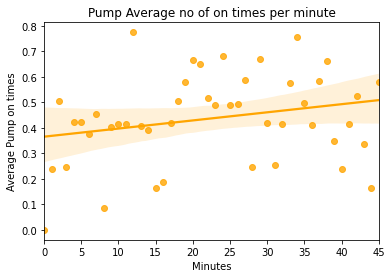

In [248]:
pump = pd.DataFrame(mean_new_df["pump"], columns=["pump"])



pump_ax = sns.regplot(x=pump.index, y="pump", color="orange", data=pump)
pump_ax.set_xlabel("Minutes")
pump_ax.set_ylabel("Average Pump on times")
pump_ax.set_title("Pump Average no of on times per minute")

### LDR Trend

Text(0.5, 1.0, 'LDR Average Light Intensity per minute')

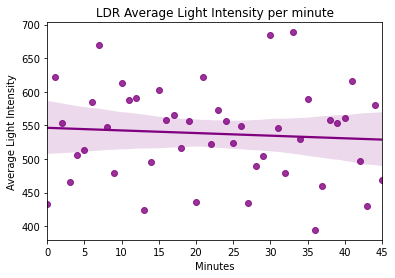

In [249]:
ldr = pd.DataFrame(mean_new_df["ldr"], columns=["ldr"])



ldr_ax = sns.regplot(x=ldr.index, y="ldr", color="purple", data=ldr)
ldr_ax.set_xlabel("Minutes")
ldr_ax.set_ylabel("Average Light Intensity")
ldr_ax.set_title("LDR Average Light Intensity per minute")

# Splitting the data

In [250]:
X  = new_df[['heater', 'humidity1', 'humidity2', 'pump', 'temp1', 'temp2']]
y = new_df['ldr']

In [251]:
X.head()

,heater,humidity1,humidity2,pump,temp1,temp2
TimeRead,,,,,,
2020-12-06 14:18:52,1.0,33.0,74.0,0.0,33.0,21.0
2020-12-06 14:18:52,1.0,33.0,74.0,0.0,33.0,21.0
2020-12-06 14:18:52,1.0,33.0,74.0,0.0,33.0,21.0
2020-12-06 14:18:52,1.0,33.0,74.0,0.0,33.0,21.0
2020-12-06 14:18:52,1.0,33.0,74.0,0.0,33.0,21.0


In [252]:
y.head()

TimeRead
2020-12-06 14:18:52    225.0
2020-12-06 14:18:52    225.0
2020-12-06 14:18:52    225.0
2020-12-06 14:18:52    225.0
2020-12-06 14:18:52    225.0
Name: ldr, dtype: float64

In [253]:
from sklearn.model_selection import train_test_split

In [254]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest model

In [255]:
from sklearn.ensemble import RandomForestRegressor

In [256]:
model = RandomForestRegressor(n_estimators=200,random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

# Evaluating the Model

In [257]:
from sklearn.metrics import mean_absolute_error

In [258]:
ldr_preds = model.predict(X_test)
print(f"Mean Absolute Error of Model Predictions: {mean_absolute_error(y_test, ldr_preds)}")

Mean Absolute Error of Model Predictions: 222.87438867491045


# Improving the model

In [259]:
from sklearn.model_selection import GridSearchCV,KFold
import numpy as np


In [260]:
# Create 10 folds
seed = 13
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

Defining our candidate hyperparameters

In [261]:
# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

n_estimators = [500, 600, 700]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]
hp_candidates = [{'n_estimators': n_estimators,
               'max_features': max_features},
              #  'max_depth': max_depth,
              #  'min_samples_split': min_samples_split,
              #  'min_samples_leaf': min_samples_leaf,
              #  'bootstrap': bootstrap}
              ]

In [262]:
# Search for best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=hp_candidates, cv=kfold, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=KFold(n_splits=10, random_state=13, shuffle=True),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=200, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose

In [263]:
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.23946735907044006
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
{'max_features': 'sqrt', 'n_estimators': 700}


In [264]:
mean_abs_errors = []
for i in range(500, 2000, 50):
  model = RandomForestRegressor(n_estimators=i, random_state=0, max_features='sqrt')
  model.fit(X_train, y_train)
  mae = mean_absolute_error(y_train, model.predict(X_train))
  mean_abs_errors.append(mae)

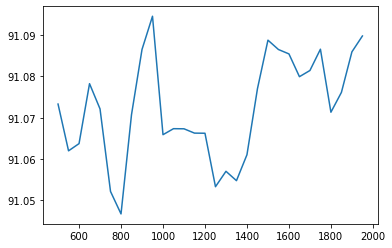

In [265]:
import matplotlib.pyplot as plt

plt.plot(list(range(500, 2000, 50)), mean_abs_errors)

The best model has n_estimators = 800 with max_features as 'sqrt'

In [266]:
  model = RandomForestRegressor(n_estimators=800, random_state=0, max_features='sqrt')
  model.fit(X_train, y_train)
  mae = mean_absolute_error(y_train, model.predict(X_train))
  print(f"Mean Absolute Error of Model Predictions(Training Data): {mae}")

Mean Absolute Error of Model Predictions(Training Data): 91.04674107532115


In [267]:
  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  print(f"Mean Absolute Error of Model Predictions(Testing Data): {mae}")

Mean Absolute Error of Model Predictions(Testing Data): 224.2288617294786


In [268]:
mean_abs_errors = []
for i in range(500, 2000, 50):
  model = RandomForestRegressor(n_estimators=i, random_state=0, max_features='auto')
  model.fit(X_train, y_train)
  mae = mean_absolute_error(y_train, model.predict(X_train))
  mean_abs_errors.append(mae)

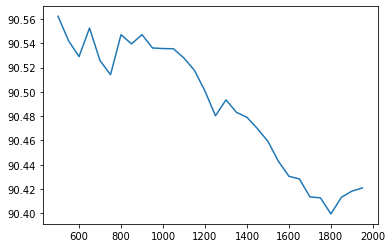

In [269]:
plt.plot(list(range(500, 2000, 50)), mean_abs_errors)

In [270]:
  model = RandomForestRegressor(n_estimators=1800, random_state=0, max_features='auto')
  model.fit(X_train, y_train)
  mae = mean_absolute_error(y_train, model.predict(X_train))
  print(f"Mean Absolute Error of Model Predictions(Training Data): {mae}")

Mean Absolute Error of Model Predictions(Training Data): 90.39945281522209


In [271]:
  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  print(f"Mean Absolute Error of Model Predictions(Testing Data): {mae}")

Mean Absolute Error of Model Predictions(Testing Data): 222.51781495580596


This model is better than the previous one since it has a lower MAE for both training and testing data

In [272]:
predictions = pd.DataFrame(zip(y_test, y_pred), columns=["LDR Actual Value", "LDR Predicted Value"])
predictions

,LDR Actual Value,LDR Predicted Value
0,994.0,646.284389
1,674.0,715.060084
2,304.0,767.325417
3,926.0,840.228889
4,762.0,267.948333
...,...,...
3802,962.0,821.009516
3803,617.0,590.949563
3804,634.0,367.850392
3805,665.0,790.095667


# LDR value Prediction 

- temp1=40
- temp2=20
- heater is off
- humidity1=60
- humidity2=90
- pump =on

In [273]:
X_test.shape

(3807, 6)

In [274]:
X_test.columns

Index(['heater', 'humidity1', 'humidity2', 'pump', 'temp1', 'temp2'], dtype='object')

In [275]:

x_test = pd.DataFrame( [[0, 60, 90, 1, 40, 20]],columns=['heater', 'humidity1', 'humidity2', 'pump', 'temp1', 'temp2'])
x_test

,heater,humidity1,humidity2,pump,temp1,temp2
0,0,60,90,1,40,20


In [276]:
x_test["Predicted LDR value"] = model.predict(x_test)
x_test

,heater,humidity1,humidity2,pump,temp1,temp2,Predicted LDR value
0,0,60,90,1,40,20,431.706493


The predicted LDR value when the heater is off, pump is on, humidity1 is 60, humidity2 is 90, temp1 is 40 and temp2 is 20 is 431.7 [+/- 222]